In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

import scipy.optimize as optimization
from scipy.optimize import least_squares

In [182]:
#C:\ti\simplelink_cc13x2_26x2_sdk_4_40_04_04\tools\ble5stack\rtls_agent\examples\3ANT\ofoghi\rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_AoA_log\04_16_2021_16_55_55_rtls_raw_iq_samples_0x11_zero_f88a5e2d7808_0.csv
# path = 'C:/ti/simplelink_cc13x2_26x2_sdk_4_40_04_04/tools/ble5stack/rtls_agent/examples/3ANT/ofoghi/rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_AoA_log/04_16_2021_16_55_55_rtls_raw_iq_samples_0x11_zero_f88a5e2d7808_0.csv' # test @ 1m 
# path = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/05_18_2021_14_27_33_rtls_raw_iq_samples_f88a5e2d7808_0.csv'
# path = 'C:/ti/simplelink_cc13x2_26x2_sdk_4_40_04_04/tools/ble5stack/rtls_agent/examples/3ANT/ofoghi/rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_AoA_log/05_24_2021_14_17_20_rtls_raw_iq_samples_0x10_30degreef88a5e2d7808_0.csv'
# path2 = 'C:/ti/simplelink_cc13x2_26x2_sdk_4_40_04_04/tools/ble5stack/rtls_agent/examples/3ANT/ofoghi/rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_AoA_log/zero_posi/30deg/05_19_2021_09_40_59_rtls_raw_iq_samples_0x10_30degreef88a5e2d7808_0.csv'
# path = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/05_04_2021_14_19_44_rtls_raw_iq_samples_f88a5e2d7808_0.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/05_04_2021_14_34_43_rtls_raw_iq_samples_30degrees_f88a5e2d7808_0.csv'
# data = pd.read_csv('rtls_raw_iq_samples_f88a5e2d8cee_45.csv')
path =  'C:/ti/simplelink_cc13x2_26x2_sdk_4_40_04_04/tools/ble5stack/rtls_agent/examples/3ANT/ofoghi/rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_AoA_log/05_25_2021_14_55_44_rtls_raw_iq_samples_0x10_f88a5e2d7808_0.csv'

data = pd.read_csv(path)
data_size = len(data)
N = int(data_size/328)
print('Number of pakts are', N, int(N/2), len(data))
t = np.arange(0, 82*N, 0.25)
print(len(t))
data['time_stamp'] = t
data['Magnitude'] = np.sqrt(np.power(data['i'], 2) + np.power(data['q'], 2))
data['phase'] = np.arctan2(data['i'], data['q'])

Number of pakts are 67 33 21976
21976


In [183]:
data

,pkt,sample_idx,rssi,ant_array,channel,i,q,time_stamp,Magnitude,phase
0,0,0,-63,1,2,-80,-74,0.00,108.977062,-2.317253
1,0,1,-63,1,2,-61,-75,0.25,96.674712,-2.458774
2,0,2,-63,1,2,0,-57,0.50,57.000000,3.141593
3,0,3,-63,1,2,0,0,0.75,0.000000,0.000000
4,0,4,-63,1,2,-5,-38,1.00,38.327536,-3.010765
...,...,...,...,...,...,...,...,...,...,...
21971,66,323,-69,1,13,32,0,5492.75,32.000000,1.570796
21972,66,324,-69,1,13,12,53,5493.00,54.341513,0.222661
21973,66,325,-69,1,13,-61,-26,5493.25,66.309879,-1.973708
21974,66,326,-69,1,13,0,84,5493.50,84.000000,0.000000


In [184]:
len(np.unique(data.channel))

36

In [185]:
data['ts'] = data['time_stamp']
t = data[data.channel >= 11]
t['omega'] = (t['channel']-11)*2+ 2428.25
tless = data[data.channel < 11]
tless['omega'] = (tless['channel'])*2 + 2404.25
data = t.append(tless)

<ipython-input-185-23b68b2b1de6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['omega'] = (t['channel']-11)*2+ 2428.25
<ipython-input-185-23b68b2b1de6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tless['omega'] = (tless['channel'])*2 + 2404.25


### NOW Optimize the RAW_IQ samples

In [186]:
import ctypes
I = data['i']
Q = data['q']
I_lst = []
Q_lst = []

for i, q in zip(I, Q):
    I_lst.append(ctypes.c_byte(i).value)
    Q_lst.append(ctypes.c_byte(q).value)
data['i_byt'] = I_lst
data['q_byt'] = Q_lst

In [187]:
data['Mag_new'] = np.sqrt(np.power(data['i_byt'], 2) + np.power(data['q_byt'], 2))
# data2['Mag_new'] = np.sqrt(np.power(data2['i_byt'], 2) + np.power(data2['q_byt'], 2))

In [188]:
# optomize the data from ANT1
def s(theta, t ):
    x = theta[0] * np.cos(2*np.pi*t*fc + phi)
    y = theta[1] * np.sin(2*np.pi*t*fc + phi)
    return np.array([x, y])

new_i_lst = []
new_q_lst = []

phi =  0

for i in range(0, len(data), 328):
    Ai = data.Mag_new[i:i+328].mean()
    Aq = data.Mag_new[i:i+328].mean()
    fc = data.omega[i:i+328].mean(); 
    ts = data.time_stamp[i:i+328]
    ss = s([Ai, Aq, fc, phi], ts)
    ss[0] += data['i_byt'][i:i+328]
    ss[1] += data['q_byt'][i:i+328]
    

    def fun(theta):
        return (ss- s(theta, ts)).flatten()

    theta0 = [0,0,0,0]
    res1 = least_squares(fun, theta0)
    N = int(len(res1.fun)/2)
    new_i1 = res1.fun[0:N]
    new_i_lst.append(new_i1)
    new_q1 = res1.fun[N:len(res1.fun)]
    new_q_lst.append(new_q1)
print('Its finished')

Its finished


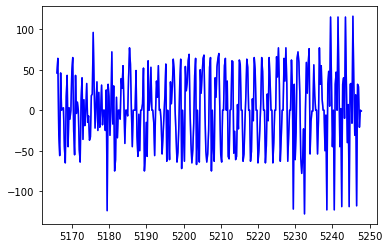

In [189]:
# plt.plot(ts[0:328], new_i_lst[0], c = 'r')
plt.plot(ts[0:328], data['i'][0:328], c = 'b')
plt.plot(ts[0:328], data['i_byt'][0:328], alpha = 0.5, c = 'b')

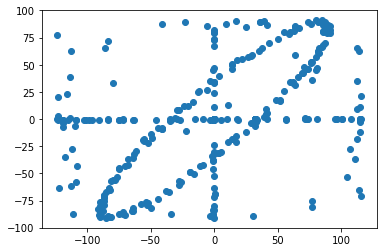

In [190]:
# plt.plot(new_i_lst2[3], new_q_lst2[3])
plt.scatter(data['i_byt'][328*5:328*6], data['q_byt'][328*5:328*6])
# plt.plot(data['i'][328*3:328*4], data['q'][328*3:328*4])

In [191]:
data.i.max(), data.i.min(), data['i_byt'].max(), data['i'].max()

(127, -128, 127, 127)

In [192]:
data.i_byt.max(), data.i_byt.min()

(127, -128)

In [193]:
data['i_byt'][624*2:624*3].min(), data['i'][624*2:624*3].min()

(-124, -124)

In [194]:
from itertools import chain
flatten_i = list(chain.from_iterable(new_i_lst))
flatten_q = list(chain.from_iterable(new_q_lst))
data['new_i'] = flatten_i
data['new_q'] = flatten_q

In [195]:
info =[]
data_size = len(data)
N = int(data_size/328)
for n in range(N):
    for i in range(36+n*328, 328*(n+1), 8):
        for j in range(i, i+4):
#             print(j)
            info.append({"pkt": n, "Channel": data['channel'][j], "sample_idx": data['sample_idx'][j], 
                         "I8bit": data['i_byt'][j],
                         "Q8bit":data['q_byt'][j],
                         "I": data['i'][j],
                         "Q":data['q'][j],
                         "Magnitude_new": data['Mag_new'][j],
                         "Magnitude": data['Magnitude'][j],
                         "time_stamp": data['time_stamp'][j], "omega": data['omega'][j], 
                          "new_i": data['new_i'][j], "new_q": data['new_q'][j],
                        "arctan2": data['phase'][j]})
    info_dec = pd.DataFrame(info)
print('finished', N)

finished 67


In [196]:
df = info_dec.drop(info_dec[info_dec.sample_idx > 319].index)
# df2 = info_dec2.drop(info_dec2[info_dec2.sample_idx > 607].index)

In [197]:
lst_ant1 = []
lst_ant2 = []
lst_ant3 = []

for i in range(0, len(df), 12):    
    lst_ant2.append(df[i:i+4])
    lst_ant1.append(df[i+4:i+8])
    lst_ant3.append(df[i+8:i+12])

In [198]:
len(lst_ant1), len( lst_ant2), len( lst_ant3)

(804, 804, 804)

In [199]:
df_ant1 = pd.concat(lst_ant1,  ignore_index=True)
df_ant2 = pd.concat(lst_ant2,  ignore_index=True)
df_ant3 = pd.concat(lst_ant3,  ignore_index=True)

In [200]:
len(df_ant1), len(df_ant2), len(df_ant3)

(3216, 3216, 3216)

array([<AxesSubplot:>], dtype=object)

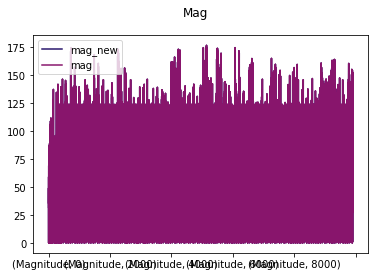

In [201]:
info_dec.unstack(level=0)[['Magnitude_new']].plot(subplots=True, title="Mag_new", color= '#28156c', label='mag_new', legend=True)
info_dec.unstack(level=0)[['Magnitude']].plot(subplots=True, title="Mag", color= '#88156c', label='mag', legend=True)

array([<AxesSubplot:>], dtype=object)

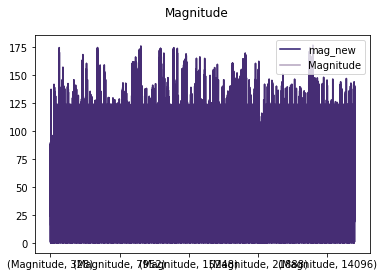

In [202]:
data.unstack(level=0)[['Mag_new']].plot(subplots=True, title="Mag_new", color= '#28156c', label='mag_new', legend=True)
data.unstack(level=0)[['Magnitude']].plot(subplots=True, title="Magnitude", color= '#65467c', label='Magnitude', legend=True, alpha = 0.5)

In [203]:
test = data[0:328*5]
indexed = test.set_index(['channel', 'sample_idx'])
indexed_modified = indexed.drop_duplicates()
indexed_modified = indexed_modified[~indexed_modified.index.duplicated(keep='first')]

array([<AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>], dtype=object)

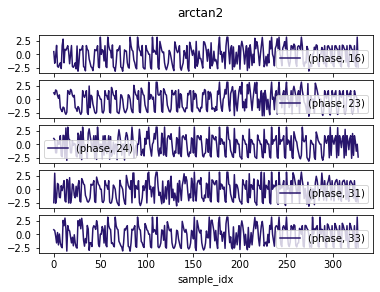

In [204]:
indexed_modified.unstack(level=0)[['phase']].plot(subplots=True, title="arctan2", color= '#28156c', label='arctan2', legend=True)

array([<AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>], dtype=object)

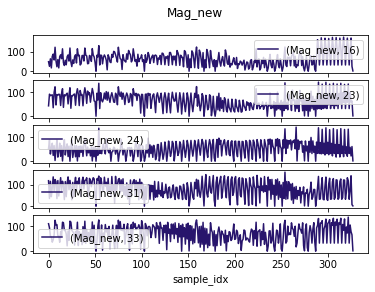

In [205]:
indexed_modified.unstack(level=0)[['Mag_new']].plot(subplots=True, title="Mag_new", color= '#28156c', label='mag_new', legend=True)

array([<AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>], dtype=object)

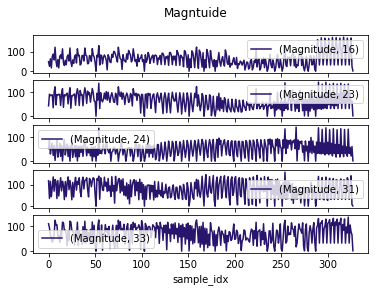

In [206]:
indexed_modified.unstack(level=0)[['Magnitude']].plot(subplots=True, title="Magntuide", color= '#28156c', label='Magntuide', legend=True)

array([<AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>], dtype=object)

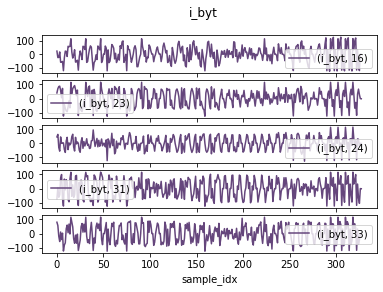

In [207]:
indexed_modified.unstack(level=0)[['i_byt']].plot(subplots=True, title="i_byt", color= '#65467c', label='Magnitude', legend=True)

array([<AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>,
       <AxesSubplot:xlabel='sample_idx'>], dtype=object)

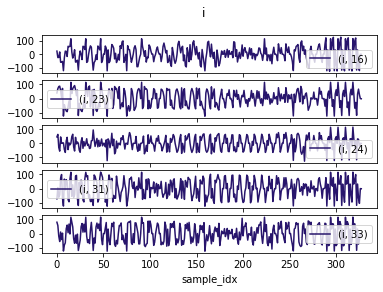

In [208]:
indexed_modified.unstack(level=0)[['i']].plot(subplots=True, title="i", color= '#28156c', label='mag_new', legend=True)

In [209]:
data['phase'].mean()* 180/np.pi

-5.572021876656609

### Caluclate the phase difference 

In [210]:
X12 = (df_ant1['I'] + 1j*df_ant1['Q']) * (df_ant2['I'] - 1j*df_ant2['Q'])
X23 = (df_ant2['I'] + 1j*df_ant2['Q']) * (df_ant3['I'] - 1j*df_ant3['Q'])
X13 = (df_ant1['I'] + 1j*df_ant1['Q']) * (df_ant3['I'] - 1j*df_ant3['Q'])
X12_opt = (df_ant1['new_i'] + 1j*df_ant1['new_q']) * (df_ant2['new_i'] - 1j*df_ant2['new_q'])
X23_opt = (df_ant2['new_i'] + 1j*df_ant2['new_q']) * (df_ant3['new_i'] - 1j*df_ant3['new_q'])
X13_opt = (df_ant1['new_i'] + 1j*df_ant1['new_q']) * (df_ant3['new_i'] - 1j*df_ant3['new_q'])
X12_8bit = (df_ant1['I8bit'] + 1j*df_ant1['Q8bit']) * (df_ant2['I8bit'] - 1j*df_ant2['Q8bit'])
X23_8bit = (df_ant2['I8bit'] + 1j*df_ant2['Q8bit']) * (df_ant3['I8bit'] - 1j*df_ant3['Q8bit'])
X13_8bit = (df_ant1['I8bit'] + 1j*df_ant1['Q8bit']) * (df_ant3['I8bit'] - 1j*df_ant3['Q8bit'])

In [211]:
print(len(X12), len(X23), len(X13), len(df_ant1), len(df_ant3), len(df_ant1))

3216 3216 3216 3216 3216 3216


In [212]:
d = {'channel': df_ant1['Channel'],'omega':df_ant1['omega']}
data_fin = pd.DataFrame(data=d)
data_fin['phi12'] = np.angle(X12)
data_fin['phi23'] = np.angle(X23)
data_fin['phi13'] = np.angle(X13)
data_fin['mag12'] = np.abs(X12)
data_fin['mag23'] = np.abs(X23)
data_fin['mag13'] = np.abs(X13)

In [213]:
data_fin['phi12_opt'] = np.angle(X12_opt)
data_fin['phi23_opt'] = np.angle(X23_opt)
data_fin['phi13_opt'] = np.angle(X13_opt)
data_fin['mag12_opt'] = np.abs(X12_opt)
data_fin['mag23_opt'] = np.abs(X23_opt)
data_fin['mag13_opt'] = np.abs(X13_opt)

In [214]:
data_fin['phi12_8bit'] = np.angle(X12_8bit)
data_fin['phi23_8bit'] = np.angle(X23_8bit)
data_fin['phi13_8bit'] = np.angle(X13_8bit)
data_fin['mag12_8bit'] = np.abs(X12_8bit)
data_fin['mag23_8bit'] = np.abs(X23_8bit)
data_fin['mag13_8bit'] = np.abs(X13_8bit)

In [215]:
data_fin['phi12_opt'][len(data_fin)-48:len(data_fin)].mean()

0.08474326798606824

In [216]:
phi_channel = []
for i in range(0, len(data_fin),48):
    phi_channel.append({"channel":data_fin['channel'][i], "omega":data_fin['omega'][i],
                       "ave_phi12": np.average(data_fin['phi12'][i:i+48]),
                       "ave_phi23": np.average(data_fin['phi23'][i:i+48]),
                        "ave_phi13": np.average(data_fin['phi13'][i:i+48]),
                        "ave_phi12_opt": np.average(data_fin['phi12_opt'][i:i+48]),
                       "ave_phi23_opt": np.average(data_fin['phi23_opt'][i:i+48]),
                        "ave_phi13_opt": np.average(data_fin['phi13_opt'][i:i+48]),
                       "ave_mag12": np.average(data_fin['mag12'][i:i+48]),
                       "ave_mag23": np.average(data_fin['mag23'][i:i+48]),
                       "ave_mag13": np.average(data_fin['mag13'][i:i+48]),
                         "ave_phi12_8bit": np.average(data_fin['phi12_8bit'][i:i+48]),
                       "ave_phi23_8bit": np.average(data_fin['phi23_8bit'][i:i+48]),
                        "ave_phi13_8bit": np.average(data_fin['phi13_8bit'][i:i+48]),
                       "ave_mag12_8bit": np.average(data_fin['mag12_8bit'][i:i+48]),
                       "ave_mag23_8bit": np.average(data_fin['mag23_8bit'][i:i+48]),
                       "ave_mag13_8bit": np.average(data_fin['mag13_8bit'][i:i+48]),})
average_perchannel = pd.DataFrame(phi_channel)
print('finished', len(data_fin), len(average_perchannel))
average_perchannel

finished 3216 67


,channel,omega,ave_phi12,ave_phi23,ave_phi13,ave_phi12_opt,ave_phi23_opt,ave_phi13_opt,ave_mag12,ave_mag23,ave_mag13,ave_phi12_8bit,ave_phi23_8bit,ave_phi13_8bit,ave_mag12_8bit,ave_mag23_8bit,ave_mag13_8bit
0,2,2408.25,-0.040444,0.055278,-0.015300,-0.240788,0.064654,-0.176134,4027.962536,4043.209059,4156.352875,-0.040444,0.055278,-0.015300,4027.962536,4043.209059,4156.352875
1,24,2454.25,0.157713,-0.126761,-0.010257,0.219022,-0.064774,0.023348,3712.626814,3831.765556,3896.962038,0.157713,-0.126761,-0.010257,3712.626814,3831.765556,3896.962038
2,9,2422.25,-0.017267,-0.011141,0.029777,-0.083520,-0.273989,0.035190,3831.537479,4169.316198,3754.719965,-0.017267,-0.011141,0.029777,3831.537479,4169.316198,3754.719965
3,1,2406.25,0.032120,0.045921,0.011872,0.128835,0.010205,0.008140,6844.644366,6786.486926,7107.209266,0.032120,0.045921,0.011872,6844.644366,6786.486926,7107.209266
4,16,2438.25,0.115533,0.061423,0.112963,0.046957,0.121789,-0.093053,4746.149629,4864.363987,4839.532171,0.115533,0.061423,0.112963,4746.149629,4864.363987,4839.532171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,15,2436.25,0.178684,-0.154189,-0.236673,0.154481,-0.074679,-0.443797,10636.303394,10889.719285,10532.588582,0.178684,-0.154189,-0.236673,10636.303394,10889.719285,10532.588582
63,0,2404.25,0.313835,0.090542,0.011783,0.210744,-0.061593,0.149151,4845.925691,4888.853713,4795.741300,0.313835,0.090542,0.011783,4845.925691,4888.853713,4795.741300
64,22,2450.25,0.400142,-0.226504,-0.153904,0.358813,-0.119635,-0.153522,5506.947162,5721.713067,5413.189063,0.400142,-0.226504,-0.153904,5506.947162,5721.713067,5413.189063
65,35,2476.25,0.306620,0.123692,0.163786,0.238587,-0.288594,0.080893,4534.698326,4342.162446,4323.950563,0.306620,0.123692,0.163786,4534.698326,4342.162446,4323.950563


In [217]:
ave_phi12 = np.average(average_perchannel['ave_phi12'])*180/np.pi
ave_phi23 = np.average(average_perchannel['ave_phi23'])*180/np.pi,
ave_phi13 = np.average(average_perchannel['ave_phi13'])*180/np.pi
total_ave = (ave_phi12+ ave_phi23 + ave_phi13)/3
print(total_ave)

[2.94959384]


In [218]:
ave_phi12_rad = np.average(average_perchannel['ave_phi12'])
ave_phi23_rad = np.average(average_perchannel['ave_phi23'])
ave_phi13_rad = np.average(average_perchannel['ave_phi13'])
theta12 = np.arccos(ave_phi12_rad*0.56)*180/np.pi, 
theta23 = np.arccos(ave_phi23_rad*0.56)*180/np.pi
theta13 = np.arccos(ave_phi13_rad/2*0.56)*180/np.pi
print(theta12, theta23,theta13,
     '\n average is:', (theta12+ theta23+theta13)/3)

(84.80475394819477,) 90.17257296953328 90.03011978822065 
 average is: [88.33581557]


In [219]:
ave_phi12_8bit = np.average(average_perchannel['ave_phi12_8bit'])*180/np.pi
ave_phi23_8bit = np.average(average_perchannel['ave_phi23_8bit'])*180/np.pi,
ave_phi13_8bit = np.average(average_perchannel['ave_phi13_8bit'])*180/np.pi
total_ave_8bit = (ave_phi12_8bit+ ave_phi23_8bit + ave_phi13_8bit)/3
print(ave_phi12_8bit, ave_phi23_8bit, ave_phi13_8bit,
      '\n total_ave_8bit (angle)', total_ave_8bit)

9.264517733938256 (-0.3081655510798707,) -0.10757066726206727 
 total_ave_8bit (angle) [2.94959384]


In [220]:
ave_phi12_opt = np.average(average_perchannel['ave_phi12_opt'])*180/np.pi
ave_phi23_opt = np.average(average_perchannel['ave_phi23_opt'])*180/np.pi,
ave_phi13_opt = np.average(average_perchannel['ave_phi13_opt'])*180/np.pi
total_ave_opt = (ave_phi12_opt+ ave_phi23_opt + ave_phi13_opt)/3
print('total_ave_opt (angle)', total_ave_opt)

total_ave_opt (angle) [0.07120786]


In [221]:
ave_phi12_opt_rad = np.average(average_perchannel['ave_phi12_opt'])
ave_phi23_opt_rad = np.average(average_perchannel['ave_phi23_opt'])
ave_phi13_opt_rad = np.average(average_perchannel['ave_phi13_opt'])
total_ave_opt_rad = (ave_phi13_opt_rad + ave_phi23_opt_rad + ave_phi12_opt_rad)/3
print('total_ave_opt_rad', total_ave_opt_rad)

total_ave_opt_rad 0.0012428116328843202


In [222]:
theta12_opt = np.arccos(ave_phi12_opt_rad*0.56)*180/np.pi,
theta23_opt = np.arccos(ave_phi23_opt_rad*0.56)*180/np.pi, 
theta13_opt = np.arccos((ave_phi13_opt_rad/2)*0.56)*180/np.pi
print(theta12_opt, theta23_opt,theta13_opt,
     '\n average is: cant be calc')

(85.8624886704739,) (92.38225066121937,) 90.81638897922168 
 average is: cant be calc


In [223]:
print(' Angle per paire', ave_phi12, ave_phi23, ave_phi13, '\n Total average of angle', total_ave)

 Angle per paire 9.264517733938256 (-0.3081655510798707,) -0.10757066726206727 
 Total average of angle [2.94959384]


In [224]:
print(' Angle per paire(rad)', ave_phi12_opt_rad, ave_phi23_opt_rad, ave_phi13_opt_rad, '\n Total average of angle', total_ave_opt_rad)

 Angle per paire(rad) 0.1288400886794416 -0.07422524831536113 -0.0508864054654275 
 Total average of angle 0.0012428116328843202


In [225]:
print(' Angle per paire OPTIMIZED', ave_phi12_opt, ave_phi23_opt, ave_phi13_opt, '\n Total average of angle_opt', total_ave_opt)

 Angle per paire OPTIMIZED 7.381993313423259 (-4.252793461780716,) -2.915576267760441 
 Total average of angle_opt [0.07120786]


In [226]:
print(' Angle per paire OPTIMIZED', ave_phi12_8bit, ave_phi23_8bit, ave_phi13_8bit, '\n Total average of angle_opt', total_ave_8bit)

 Angle per paire OPTIMIZED 9.264517733938256 (-0.3081655510798707,) -0.10757066726206727 
 Total average of angle_opt [2.94959384]


array([<AxesSubplot:>], dtype=object)

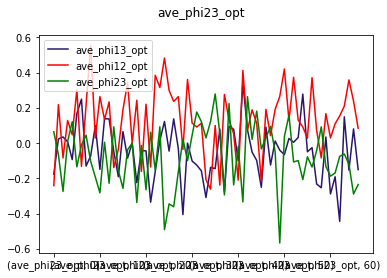

In [227]:
average_perchannel.unstack(level=0)[['ave_phi13_opt']].plot(subplots=True, title="ave_phi13_opt", color= '#28156c', label='ave_phi13_opt', legend=True)
average_perchannel.unstack(level=0)[['ave_phi12_opt']].plot(subplots=True, title="ave_phi12_opt", color= 'r', label='ave_phi12_opt', legend=True)
average_perchannel.unstack(level=0)[['ave_phi23_opt']].plot(subplots=True, title="ave_phi23_opt", color= 'g', label='ave_phi23_opt', legend=True)

array([<AxesSubplot:>], dtype=object)

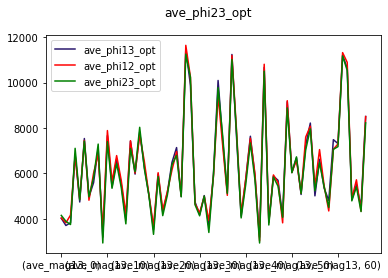

In [228]:
average_perchannel.unstack(level=0)[['ave_mag12']].plot(subplots=True, title="ave_phi13_opt", color= '#28156c', label='ave_phi13_opt', legend=True)
average_perchannel.unstack(level=0)[['ave_mag23']].plot(subplots=True, title="ave_phi12_opt", color= 'r', label='ave_phi12_opt', legend=True)
average_perchannel.unstack(level=0)[['ave_mag13']].plot(subplots=True, title="ave_phi23_opt", color= 'g', label='ave_phi23_opt', legend=True)

### Import the correction file

## USING NNL

theta = arcsin/cos((land/(2.pi*dij)) * deltaphi(ij)) 

In [230]:
# defining the target angle 
real_phi= 0
sin = np.sin(np.deg2rad(real_phi))
landa = 2.9e8/(average_perchannel.omega*1e6)
d12 = 3.5e-2
ex_phi12 = (sin* 2*np.pi*d12)/landa
expected_angel = ex_phi12.mean()*180/np.pi
expected_angel

0.0

In [57]:
target = ex_phi12
input_feature = average_perchannel.ave_phi12_opt
weights = np.random.rand(len(input_feature),1)
baias = 0.3 
lr = 0.05

In [58]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [59]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [60]:
# Running the code 1000 times:
for epoch in range(1000):
    inputs = input_feature
    
    # Feed_forward input:
    in_o = np.dot(inputs, weights) + baias
    
    # Feed_forward output:
#     out_o = sigmoid(in_o) + ex_phi12.mean()
    out_o = sigmoid(in_o) 

    
    #Backpropagation
    # Calculating error
    error = out_o - target
    
    # Going with the formula:
    x = error.sum()
#     print(x)
    
    # Calculating derivatives:
    derror_douto = error
    douto_dino = sigmoid_der(out_o)
    
    # Multiplying individual derivations:
    derive = derror_douto * douto_dino
    
    # Multiplying with the 3rd individual derivative:
    # Finding the transpose of input_features:
    inputs = input_feature.T 
    derive_final = np.dot(inputs, derive)
    
    # updating the weights values:
    weights -= lr* derive_final
    
    # Updating the bais weight value:
    for i in derive:
        baias -= lr*i 

In [61]:
# Now that the mode is trained, see how does it predict

In [62]:
len(weights), len(average_perchannel), baias, weights[0], average_perchannel.ave_phi23_opt[12]

(72, 72, 2.868619908162312, array([0.07438886]), 0.05887218874132877)

In [63]:
ave_phi23_arr = np.asarray(average_perchannel.ave_phi23_opt)

In [64]:
for i in range(len(ave_phi23_arr)):
    result1 = np.dot(ave_phi23_arr[i], weights[i]) + baias
    result2 = sigmoid(result1)+ ex_phi12.mean()
    print(result1,result2, 'and theta is', np.arccos(result2*0.56)*180/np.pi)

[2.91134166] [1.87493937] and theta is [nan]
[2.99410601] [1.87884226] and theta is [nan]
[2.91714172] [1.87522245] and theta is [nan]
[3.15956095] [1.88581892] and theta is [nan]
[2.9342465] [1.87604875] and theta is [nan]
[2.88288555] [1.87352901] and theta is [nan]
[2.75653947] [1.86681673] and theta is [nan]
[3.14062999] [1.88507304] and theta is [nan]
[2.88626411] [1.87369835] and theta is [nan]
[3.11293401] [1.88395823] and theta is [nan]
[3.26697973] [1.8898136] and theta is [nan]
[3.00660655] [1.87940681] and theta is [nan]
[2.91881094] [1.87530365] and theta is [nan]
[2.94778915] [1.87669401] and theta is [nan]
[3.16098289] [1.88587442] and theta is [nan]
[3.15204576] [1.88552437] and theta is [nan]
[3.16225402] [1.88592397] and theta is [nan]
[2.93129264] [1.87590696] and theta is [nan]
[3.0118173] [1.87964026] and theta is [nan]
[2.97650915] [1.87803665] and theta is [nan]
[3.01832981] [1.87993049] and theta is [nan]
[3.16231817] [1.88592647] and theta is [nan]
[2.99985014] 

<ipython-input-64-1a91896b2406>:4: RuntimeWarning: invalid value encountered in arccos
  print(result1,result2, 'and theta is', np.arccos(result2*0.56)*180/np.pi)
